# Naive Bayes

***

Exemplo adaptado de [Rafael Sakurai](https://www.sakurai.dev.br/classificacao-naive-bayes/)

In [38]:
pip install ucimlrepo

### Importando bibliotecas

In [39]:
#Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

#Classes do modelo de aprendizado
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

#Funções de avaliação dos modelos
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Carregando os dados

In [40]:
dataset = pd.read_csv('https://raw.githubusercontent.com/gabrielh10/ml_practice_tutoring/main/datasets/jogar.csv')
dataset

,tempo,temperatura,humidade,vento,jogar
0,sol,quente,alta,não,não
1,sol,quente,alta,sim,não
2,nublado,quente,alta,não,sim
3,chuva,suave,alta,não,sim
4,chuva,frio,normal,não,sim
5,chuva,frio,normal,sim,não
6,nublado,frio,normal,sim,sim
7,sol,suave,alta,não,não
8,sol,frio,normal,não,sim
9,chuva,suave,normal,não,sim


### Pergunta:
sol - quente - normal - vento - ???

### Preparando os dados

Todas as características que temos neste dataset são categóricas. Vamos converter os dados para valores numéricos usando o [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

O LabelEncoder codifica os rótulos com valores entre 0 e n_classes-1.

In [41]:
from sklearn import preprocessing

tempo_le = preprocessing.LabelEncoder()
tempo = tempo_le.fit_transform(dataset['tempo'].values)

print("Categorias encontradas para tempo: {}".format(tempo_le.classes_))
print("Valores Codificados:", np.unique(tempo))
print("Valores Reais:", tempo_le.inverse_transform([0,1,2]))

temperatura_le = preprocessing.LabelEncoder()
temperatura = temperatura_le.fit_transform(dataset['temperatura'].values)

print("\nCategorias encontradas para temperatura: {}".format(temperatura_le.classes_))
print("Valores Codificados:", np.unique(temperatura))
print("Valores Reais:", tempo_le.inverse_transform([0,1,2]))

humidade_le = preprocessing.LabelEncoder()
humidade = humidade_le.fit_transform(dataset['humidade'].values)

print("\nCategorias encontradas para humidade: {}".format(humidade_le.classes_))
print("Valores Codificados:", np.unique(humidade))
print("Valores Reais:", humidade_le.inverse_transform([0,1]))

vento_le = preprocessing.LabelEncoder()
vento = vento_le.fit_transform(dataset['vento'].values)

print("\nCategorias encontradas para vento: {}".format(vento_le.classes_))
print("Valores Codificados:", np.unique(vento))
print("Valores Reais:", vento_le.inverse_transform([0,1]))

Categorias encontradas para tempo: ['chuva' 'nublado' 'sol']
Valores Codificados: [0 1 2]
Valores Reais: ['chuva' 'nublado' 'sol']

Categorias encontradas para temperatura: ['frio' 'quente' 'suave']
Valores Codificados: [0 1 2]
Valores Reais: ['chuva' 'nublado' 'sol']

Categorias encontradas para humidade: ['alta' 'normal']
Valores Codificados: [0 1]
Valores Reais: ['alta' 'normal']

Categorias encontradas para vento: ['não' 'sim']
Valores Codificados: [0 1]
Valores Reais: ['não' 'sim']


### Separando o conjunto de dados

Vamos criar um novo dataset com esses valores convertidos.

In [42]:
dataset2 = pd.DataFrame()
dataset2['tempo'] = tempo
dataset2['temperatura'] = temperatura
dataset2['humidade'] = humidade
dataset2['vento'] = vento

In [43]:
X = dataset2.values
dataset2

,tempo,temperatura,humidade,vento
0,2,1,0,0
1,2,1,0,1
2,1,1,0,0
3,0,2,0,0
4,0,0,1,0
5,0,0,1,1
6,1,0,1,1
7,2,2,0,0
8,2,0,1,0
9,0,2,1,0


X é a entrada dos dados. Vamos fazer o mesmo para a coluna da variável-alvo (y).

In [44]:
jogar_le = preprocessing.LabelEncoder()
y = jogar_le.fit_transform(dataset['jogar'].values)

In [45]:
print(y)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [46]:
print("Categorias encontradas para jogar: {}".format(jogar_le.classes_))

Categorias encontradas para jogar: ['não' 'sim']


Agora y é o vetor com os valores representando as classes.

### Treinamento do modelo

[CategoricalNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html#sklearn.naive_bayes.CategoricalNB) - Implementa o algoritmo de Naive Bayes categórico para dados distribuídos categoricamente.

[GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) - Implementa o algoritmo Gaussian Naive Bayes para classificação. A probabilidade das features é assumida como gaussiana.

[MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) - Implementa o algoritmo Naive Bayes para dados multinomialmente distribuídos e é uma das duas variantes clássicas Naive Bayes usadas na classificação de texto. A distribuição multinomial modela o número de vezes que ocorrem categorias específicas em um conjunto.

[BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB) - Implementa o algoritmo Naive Bayes para dados que são distribuídos de acordo com distribuições multivariadas de Bernoulli; ou seja, pode haver várias features, mas cada um é assumido como uma variável de valor binário.

Mais detalhes [link](https://scikit-learn.org/stable/modules/naive_bayes.html#).

Como selecionar:

- Features categóricas: CategoricalNB
- Features contínuas: GuassianNB
- Distribuições com features discretas, ou uma contagem (0, 1, 2, 3, ...): MultinomialNB ou ComplementNB
- Para features como distribuições de Bernoulli: BernoulliNB

In [47]:
from sklearn.naive_bayes import CategoricalNB

model = CategoricalNB() #inicializada como uma instância da classe CategoricalNB
model.fit(X, y) #objeto model é treinado com os dados definidos acima

CategoricalNB()

### Pergunta:
sol - quente - normal - vento - ???

In [48]:
nova_amostra = [
      tempo_le.transform(['sol'])[0],
      temperatura_le.transform(['quente'])[0],
      humidade_le.transform(['normal'])[0],
      vento_le.transform(['sim'])[0]
  ]

print(nova_amostra)

[np.int64(2), np.int64(1), np.int64(1), np.int64(1)]


Usamos predict_proba para calcular a probabilidade de pertencer a cada classe.

In [49]:
probabilidade = model.predict_proba([nova_amostra])
saida = model.predict([nova_amostra])

In [50]:
probabilidade

array([[0.54041983, 0.45958017]])

In [51]:
saida

array([0])

In [52]:
print(jogar_le.inverse_transform(saida))

['não']


## Outro Dataset (IRIS)

In [53]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets


dataset = pd.concat([X,y], axis=1)
dataset

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [54]:
#Mapeando os valores da classe para inteiro (para fins de visualização)
#dataset["diagnosis"] = pd.factorize(dataset["Diagnosis"])[0]
# M = 0
# B = 1

# Seleciona todos os campos menos a classe alvo para a variável "X".
X = dataset.loc[:,["petal length", "petal width"]]
y = dataset.loc[:,"class"]

X

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


### Representação gráfica da distribuição

O gráfico de estimativa de densidade de kernel (***kernel density estimate*** - KDE) é um método para visualizar a distribuição de observações em um conjunto de dados, análogo a um histograma. O KDE representa os dados usando uma curva de densidade de probabilidade contínua em uma ou mais dimensões.

[LINK](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

Text(0.5, 1.0, 'petal width (cm)')

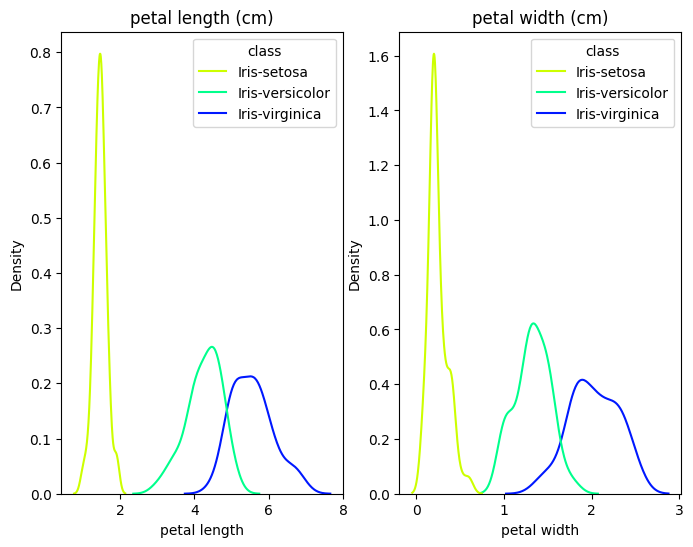

In [55]:
plot_data = X.copy()
plot_data["class"] = y.copy()

fig, ax = plt.subplots(1,2, figsize=(8,6))

sns.kdeplot(data=plot_data, x="petal length", hue="class", palette='gist_rainbow', ax=ax[0], kernel='gau')
ax[0].set_title("petal length (cm)")

sns.kdeplot(data=plot_data, x="petal width", hue="class", palette='gist_rainbow', ax=ax[1], kernel='gau')
ax[1].set_title("petal width (cm)")

In [56]:
#Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
y = pd.factorize(dataset['class'])[0]

In [57]:
#Separando o conjunto de dados em treinamento e teste
seed=42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)
X

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [58]:
def show_decision_region(X, y, model):
    feature_0 = X.columns[0]
    feature_1 = X.columns[1]

    # Convert y to a numpy array if it's a pandas Series
    if isinstance(y, pd.Series):
        y = y.values

    plot_decision_regions(np.array([X[feature_0].values,
                                    X[feature_1].values]).T,
                                    y, model)
    plt.xlabel(feature_0)
    plt.ylabel(feature_1)

    plt.title(model.__class__.__name__)
    plt.show()

GaussianNB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


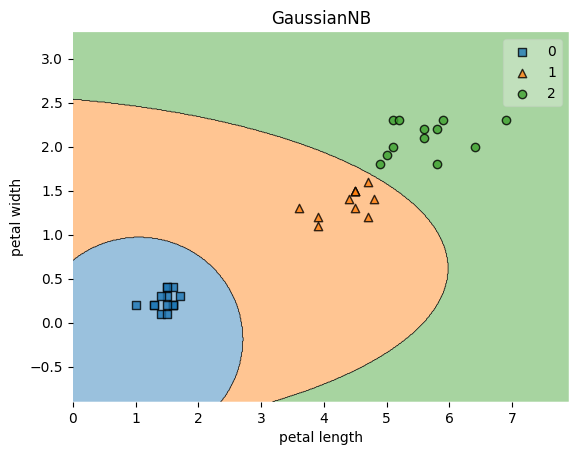

BernoulliNB
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.29      1.00      0.45        11
           2       0.00      0.00      0.00        12

    accuracy                           0.29        38
   macro avg       0.10      0.33      0.15        38
weighted avg       0.08      0.29      0.13        38

[[ 0 15  0]
 [ 0 11  0]
 [ 0 12  0]]


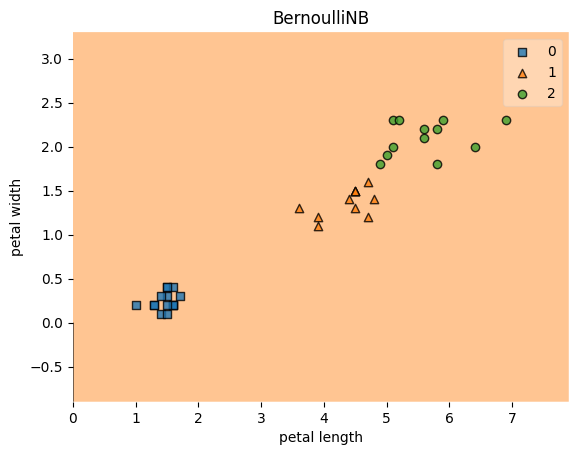

MultinomialNB
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        15
           1       0.34      1.00      0.51        11
           2       1.00      0.42      0.59        12

    accuracy                           0.45        38
   macro avg       0.78      0.49      0.41        38
weighted avg       0.81      0.45      0.38        38

[[ 1 14  0]
 [ 0 11  0]
 [ 0  7  5]]


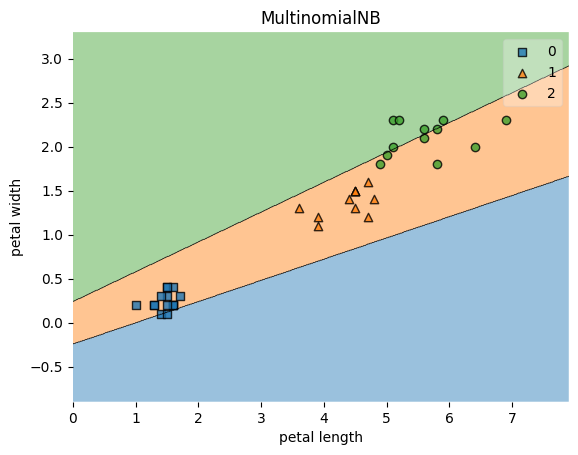

In [59]:
# Comportamento de diferentes modelos

names = ["GaussianNB", "BernoulliNB", "MultinomialNB"]

classifiers = [GaussianNB(), BernoulliNB(), MultinomialNB()]

count = 0

for nome, clf in zip(names, classifiers): #zip itera sobre múltiplas listas simultaneamente
  model = clf
  #treinando o modelo
  model.fit(X_train, y_train)

  #predição
  y_pred = model.predict(X_test) #armazena as previsões do modelo
  proba = model.predict_proba(X_test) #armazena as probabilidades previstas para cada classe.

  #Resultados do classificador
  print(nome)
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))
  show_decision_region(X_test, y_test, model)

## SERIE A Dataset

In [60]:
dataset = pd.read_csv('https://raw.githubusercontent.com/gabrielh10/ml_practice_tutoring/main/datasets/serie_a.csv')
dataset

,Team,HasHighBudget,HasStrongSquadDepth,HasExperiencedCoach,HasRecentTitle,HasLargeFanbase,HasStableManagement,PlaysInLibertadores2025,WasTop6In2024,FightForTitle2025
0,Flamengo,1,1,1,1,1,1,1,1,1
1,Palmeiras,1,1,1,1,1,1,1,1,1
2,Atletico-MG,1,1,1,1,0,0,1,1,1
3,Gremio,1,1,1,1,0,1,0,0,0
4,Sao_Paulo,1,1,1,1,1,1,1,1,1
5,Internacional,1,0,1,0,0,0,1,0,0
6,Fluminense,0,0,1,1,0,0,1,0,0
7,Botafogo,0,0,0,0,0,0,1,1,0
8,Corinthians,1,0,0,0,1,0,0,0,0
9,Cruzeiro,0,0,1,0,0,1,1,1,0


In [61]:
X = dataset.iloc[:,:-1]
y = dataset.loc[:,"FightForTitle2025"]

X.drop(columns=["Team"], inplace=True)
X

,HasHighBudget,HasStrongSquadDepth,HasExperiencedCoach,HasRecentTitle,HasLargeFanbase,HasStableManagement,PlaysInLibertadores2025,WasTop6In2024
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
2,1,1,1,1,0,0,1,1
3,1,1,1,1,0,1,0,0
4,1,1,1,1,1,1,1,1
5,1,0,1,0,0,0,1,0
6,0,0,1,1,0,0,1,0
7,0,0,0,0,0,0,1,1
8,1,0,0,0,1,0,0,0
9,0,0,1,0,0,1,1,1


In [62]:
#Separando o conjunto de dados em treinamento e teste
seed=42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)
X_train.shape, X_test.shape

((15, 8), (5, 8))

In [63]:
# Comportamento de diferentes modelos

names = ["GaussianNB", "BernoulliNB", "MultinomialNB"]

classifiers = [GaussianNB(), BernoulliNB(), MultinomialNB()]

count = 0

for nome, clf in zip(names, classifiers): #zip itera sobre múltiplas listas simultaneamente
  model = clf
  #treinando o modelo
  model.fit(X_train, y_train)

  #predição
  y_pred = model.predict(X_test) #armazena as previsões do modelo
  proba = model.predict_proba(X_test) #armazena as probabilidades previstas para cada classe.

  #Resultados do classificador
  print(nome)
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

GaussianNB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

[[3 0]
 [0 2]]
BernoulliNB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

[[3 0]
 [0 2]]
MultinomialNB
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighte

In [64]:
#Treinando usando todos os dados disponíveis no dataset
model_bernoulli = BernoulliNB()
model_bernoulli.fit(X, y)

BernoulliNB()

In [65]:
nova_amostra = [
      1, #HasHighBudget
      1, #HasStrongSquadDepth
      1, #HasExperiencedCoach
      1, #HasRecentTitle
      1, #HasLargeFanbase
      1, #HasStableManagement
      0, #PlaysInLibertadores2025
      0 ] #WasTop6In2024

print(nova_amostra)

[1, 1, 1, 1, 1, 1, 0, 0]


In [66]:
probabilidade = model_bernoulli.predict_proba([nova_amostra])
saida = model_bernoulli.predict([nova_amostra])

In [67]:
probabilidade

array([[0.04282272, 0.95717728]])

In [68]:
print("O time será campeão?", bool(saida[0]))

O time será campeão? True
